> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

##### This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue




In [41]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
df = pd.read_csv('tmdb-movies.csv')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [42]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

In [43]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

This data set has the above data on various movies.  
The 'budget_adj' and 'revenue_adj' columns have coressponding values adjusted for inflation.

The questions I want to get answers to are as follows : 
1. Which movie budget range gave the highest ROI?
2. Which genres make the most profit?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [44]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [45]:
df.shape

(10866, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Some columns have quite a bit of missing values which can't be filled effectively but are also not important for the questions I want to ask  
The cast & director comlumns however have some null values which I will drop   
And the release_date will be converted to date_time  
Any na values in the genres column will also be dropped 

Looks like the columns id and imdb_id dont seem to have an obvious use for the data analysis so they will be dropped

Also the budget and revenue columns will be dropped as I am going to compare them using the values adjusted for inflation 

After doing some analysis I relaized that the a lot of the movies budget column contained 0 so I will be dropping these rows 


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

Dropping duplicated rows

In [47]:
df = df.drop_duplicates()

Dropping the specified columns 

In [48]:
df.drop(['id', 'imdb_id','budget', 'revenue'], axis = 1 , inplace = True)

Removing rows with Na in the specified columns

In [49]:
df.dropna(subset = ['cast', 'director', 'genres'], axis = 0, inplace = True )
df.isnull().sum()

popularity                 0
original_title             0
cast                       0
homepage                7838
director                   0
tagline                 2730
keywords                1425
overview                   2
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Converting the 'release_date' column to a date time formate

In [50]:
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

Dropping rows where budget or revenue = 0 

In [51]:
df = df.drop(df[(df.budget_adj == 0 ) | (df.revenue_adj == 0 )].index)

Now I will do one final check to make sure that all the changes have been applied correctly 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3849 non-null   float64       
 1   original_title        3849 non-null   object        
 2   cast                  3849 non-null   object        
 3   homepage              1424 non-null   object        
 4   director              3849 non-null   object        
 5   tagline               3572 non-null   object        
 6   keywords              3713 non-null   object        
 7   overview              3849 non-null   object        
 8   runtime               3849 non-null   int64         
 9   genres                3849 non-null   object        
 10  production_companies  3805 non-null   object        
 11  release_date          3849 non-null   datetime64[ns]
 12  vote_count            3849 non-null   int64         
 13  vote_average     

<a id='eda'></a>
## Exploratory Data Analysis



### Lets see which movie budget range gave the highest ROI 

First I will calculate the profit for each movie 

Then I will create another column which has the ROI (in percentage) calculated from adjusted budget and revenue   

In [53]:
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(1)

,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [54]:
df['roi'] = (df['profit']/ df['budget_adj']) *100 
df.head(1)

,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,roi
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,909.019207


Now lets plot a scatter plot of the budget against the ROI 

In [55]:
def label_graph(xlabel, ylabel, title = None):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

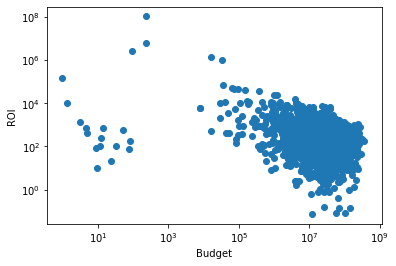

In [56]:
plt.scatter(x = df['budget_adj'], y = df['roi']);
plt.yscale('log')
plt.xscale('log')


label_graph('Budget', 'ROI')

Most movies had higher budgets (the distribution is skewed to the left)  
Surprisingly there seems to be a decline in the roi as budget increases

Now lets calculate the mean roi for movies with different budgets. We will bin them into categories to plot a bar chart 

In [57]:
cut_offs = [0, 10e5, 10e6, 10e7,10e8]
labels = ['very low', 'low', 'medium', 'high']
df['budget_ordinal'] = pd.cut(df['budget_adj'], bins = cut_offs, labels = labels)
df[df['budget_adj'] == df['budget_adj'].max()]

,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,roi,budget_ordinal
2244,0.25054,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,assassin|small town|revenge|deception|super speed,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,-413912431.0,-97.39116,high


Lets calculate the mean for each group

In [58]:
budget_ordinal_mean = df.groupby('budget_ordinal')['roi'].mean()
budget_ordinal_mean

budget_ordinal
very low    944457.035314
low            658.215066
medium         242.945617
high           188.729070
Name: roi, dtype: float64

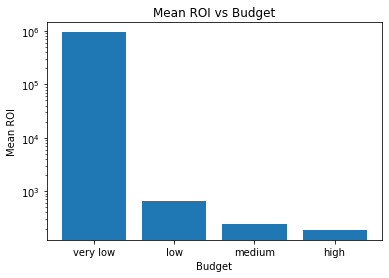

In [59]:
budget_ordinal_mean.values
plt.bar(budget_ordinal_mean.index, budget_ordinal_mean.values);
plt.yscale('log')

label_graph('Budget', 'Mean ROI', 'Mean ROI vs Budget')

As you can see higher budgets correspond with lower ROIs 

### Which genres made the most profit?

First lets change the genres column format into a one that we can deal with 

In [60]:
df['genres'] = df['genres'].str.split('|')
df = df.explode('genres')


Time to plot 

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


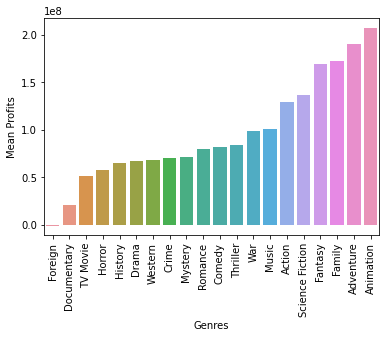

In [61]:
genres_profit = df.groupby('genres')['profit'].mean().sort_values()

sns.barplot(genres_profit.index, genres_profit.values)
plt.xticks(rotation=90);
label_graph('Genres', 'Mean Profits')

Wow looks like documenataries are all the way at the left but for sake of fairness lets compare them using ROI

    Which genre has the highest ROI?

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


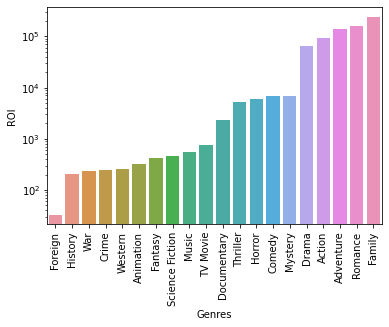

In [62]:
genres_profit = df.groupby('genres')['roi'].mean().sort_values()

sns.barplot(genres_profit.index, genres_profit.values)
plt.xticks(rotation=90);
plt.yscale('log')

label_graph('Genres', 'ROI')

The top 5 geners are family, romance, adventure, action, drama but if these genres generate the highest ROIs shouldn't this entice moviemakers to make more of them?


C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


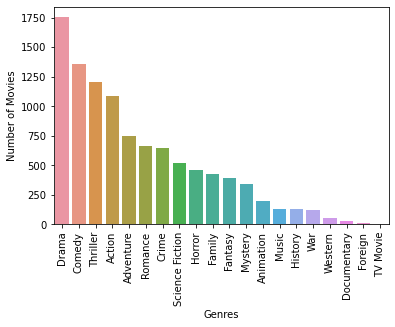

In [63]:
n_movies_genre = df['genres'].value_counts()
sns.barplot(n_movies_genre.index, n_movies_genre.values)
plt.xticks(rotation =90);

label_graph('Genres', 'Number of Movies')

There seems to be some correlation here between the genres which have high ROIs and the number of movies in that genre, which is to be expected.

<!-- What genre has the highest ROI -->

<a id='conclusions'></a>
## Conclusions


> I started the analysis by cleaning the data. In the process I dropped a lot of rows of data that were incomplete. This limitted my sample size dramatically.
> I then plotted the budget of each movie against the ROI. The plot showed that movies with higher budgets had lower ROI, although they may have had higher profits. The sample size of movies with low budgets was much less the the movies with high budgets so the comparison was not fair, this was one of the limitations of this analysis
> I then went on to discuss which genres had the highest profits and roi. Animation had the highest profits but due to the high cost of production the genre had a bellow average ROI. The genre with the highest ROI was family. There was also a correlation between the genres with the highest ROIs and the total number of movies in each genre. The drama genre had the most movies. 
> One limitation I faced was the low number of movies available for analysis after dropping a lot of them due to incomplete data (mostly missing budgets and revenues)
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1